In [176]:
import pickle
import nltk
import pandas as pd
import numpy as np
import re
import glob
%matplotlib inline

In [177]:
filepath = "./Short-Text-Corpus-For-Humor-Detection/datasets/humorous_oneliners.pickle"

with open(filepath,'rb') as file:
    corpus = pickle.load(file)
    corpus_tokens = Text(word_tokenize(" ".join(corpus)))




# with open(filepath,"rb") as file:
#     u = pickle._Unpickler(file)
#     u.encoding = 'utf8'
#     corpus = u.load()
#     print(corpus)
    

'The two make love.'

In [44]:
from nltk.corpus import brown


In [45]:
print(brown.readme())

BROWN CORPUS

A Standard Corpus of Present-Day Edited American
English, for use with Digital Computers.

by W. N. Francis and H. Kucera (1964)
Department of Linguistics, Brown University
Providence, Rhode Island, USA

Revised 1971, Revised and Amplified 1979

http://www.hit.uib.no/icame/brown/bcm.html

Distributed with the permission of the copyright holder,
redistribution permitted.



In [314]:
from nltk import word_tokenize, sent_tokenize

In [179]:
token_string = " ".join(corpus)
words_only = r'\w*'
processed_token_string = re.findall(words_only,token_string)
tokens = word_tokenize((" ".join(processed_token_string)).lower())


In [180]:
tokens = Text(tokens)


In [181]:
tokens.vocab()

FreqDist({'a': 3502, 'the': 3067, 'i': 2991, 'to': 1807, 'you': 1580, 'it': 1275, 'my': 1243, 'and': 1123, 's': 1114, 'what': 1015, ...})

In [182]:
from nltk.corpus import stopwords

In [183]:
tokens = Text([word for word in tokens if word not in stopwords.words("english")])

my_lemmatizer = WordNetLemmatizer()

tokens = [my_lemmatizer.lemmatize(i) for i in tokens]


In [185]:
tokens = Text(tokens)
tokens.vocab()

FreqDist({'get': 324, 'say': 308, 'one': 300, 'said': 300, 'got': 287, 'like': 281, 'call': 280, 'wife': 264, 'people': 219, 'go': 203, ...})

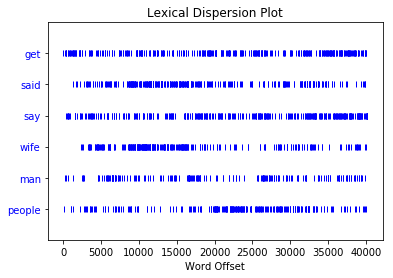

In [190]:
tokens.dispersion_plot(["get","said","say","wife","man","people"])

In [136]:
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer, WordNetLemmatizer


In [101]:
my_stemmer = PorterStemmer()

'insan'

In [137]:
my_lemmatizer = WordNetLemmatizer()

'say'

In [88]:
corpus_tokens.concordance("said",lines=100)

Displaying 25 of 25 matches:
cover the Sahara Desert . It has been said that we only use 15 % of our brain . 
top singing oasis songs in public . I said maybe . I used to hate math , but now
I wanted to look sharp , but everyone said it was tacky . Sorry I 'm poor , I ca
ultiplying . Things are always easier said than done..Except for talking , that 
oday.I went to the local airfield and said , `` Stupid parachute morons jumping 
witter to my friend . But she finally said `` I do n't follow you '' Where are a
honed to ask how he was and the nurse said , 'There 's no change yet ' Why did n
. The phone rang and a woman 's voice said , `` What the hell are you doing with
oad , when a chicken came running and said `` No do n't do it ! You 'll never he
ne . I did n't buy one . My wife just said I was ignorant..Nonsense ! Why ? I do
ecause it 's too wet to woo . My wife said that I only ever want sex with her wh
he could teach me to do the splits.He said `` How flexible are you ? '' . I said

No common contexts were found


In [297]:


file_list = glob.glob("./Short-Text-Corpus-For-Humor-Detection/datasets/*.pickle")
documents = []
document_tokens = {}
for i in file_list:
    with open(i,'rb') as file:
        name = re.findall("\/([\w_]*)\.pickle$",i)    
        u = pickle._Unpickler(file)
        u.encoding = 'utf8'
        corpus = u.load()
        documents.append(" ".join(corpus))
        corpus_tokens = Text(word_tokenize(" ".join(corpus)))
        








In [315]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=word_tokenize,stop_words="english")


<5x22641 sparse matrix of type '<class 'numpy.float64'>'
	with 40578 stored elements in Compressed Sparse Row format>

In [321]:
feature_names = tfidf.get_feature_names()

In [326]:
sparse_m = tfidf.fit_transform(documents)

In [338]:
print(sparse_m[0,:10])

  (0, 5)	0.010200283635890416
  (0, 2)	0.001378287454642955
  (0, 4)	0.003618004568437757
  (0, 0)	0.0008743100259334641
  (0, 6)	0.0005828733506223094
  (0, 3)	0.0012060015228125855
  (0, 1)	0.0005168577954911081


In [339]:
feature_names

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'07",
 "'32",
 "'6",
 "'98",
 "'a",
 "'aarrgghh",
 "'absolute",
 "'absurd",
 "'affluenza",
 "'again",
 "'age",
 "'agents",
 "'aha",
 "'alarming",
 "'all",
 "'allah",
 "'am",
 "'amputee",
 "'anarchists",
 "'anti",
 "'anti-islamic",
 "'arab",
 "'are",
 "'arsehole",
 "'ashamed",
 "'at",
 "'august",
 "'avoid",
 "'avoiding",
 "'b",
 "'baby",
 "'bad",
 "'baseless",
 "'battle",
 "'bed",
 "'being",
 "'bimbo",
 "'blackstar",
 "'blue",
 "'bluster",
 "'bob",
 "'bomb",
 "'border",
 "'breakthrough",
 "'brexit",
 "'brink",
 "'bser",
 "'bullying",
 "'bursary'.it",
 "'by-and-bye",
 "'c",
 "'caliphate",
 "'can",
 "'cash",
 "'cause",
 "'cessation",
 "'challenged",
 "'chapo",
 "'cheap",
 "'child",
 "'christmassy",
 "'civil",
 "'cling",
 "'closely",
 "'combat",
 "'common",
 "'concerned",
 "'confessions",
 "'cooler",
 "'creativity",
 "'cried",
 "'crime",
 "'crisis",
 "'critical",
 "'d",
 "'dad",
 "'dear",
 "'deceit",
 "'decisive",
 "'declaration",
 "'deeply",
 "

In [281]:
transformed = tfidf.fit(['a guy is','a girl in the room'])

['wiki_sentences']


In [284]:
result = transformed.transform(['a guy is','a girl in the room'])

['./Short-Text-Corpus-For-Humor-Detection/datasets/wiki_sentences.pickle',
 './Short-Text-Corpus-For-Humor-Detection/datasets/humorous_oneliners.pickle',
 './Short-Text-Corpus-For-Humor-Detection/datasets/reuters_headlines.pickle',
 './Short-Text-Corpus-For-Humor-Detection/datasets/proverbs.pickle',
 './Short-Text-Corpus-For-Humor-Detection/datasets/oneliners_incl_doubles.pickle']

<2x6 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Dictionary Of Keys format>

In [273]:
sparse_m = transformed.transform(raw_documents=documents)

In [276]:
transformed.get_feature_names

['humorous_oneliners',
 'oneliners_incl_doubles',
 'proverbs',
 'reuters_headlines',
 'wiki_sentences']

In [278]:
print(re.findall("\/([\w_]*)\.pickle$",'./Short-Text-Corpus-For-Humor-Detection/datasets/wiki_sentences.pickle'))

['wiki_sentences']
